In [1]:
import tensorflow

In [2]:
print(tensorflow.__version__)

2.20.0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [6]:
## setting the training data directory
DataDir = r'archive/chest_xray/train/'

In [13]:
#intializing the categoriory of classification
CATEGORIES = ['NORMAL','PNEUMONIA']

In [ ]:
for i in CATEGORIES:
    path = os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

### Intializing the size(pixel) of image  or reshape of the pixel of image  so every image should be equal or same dimension

In [16]:
img_size = 100

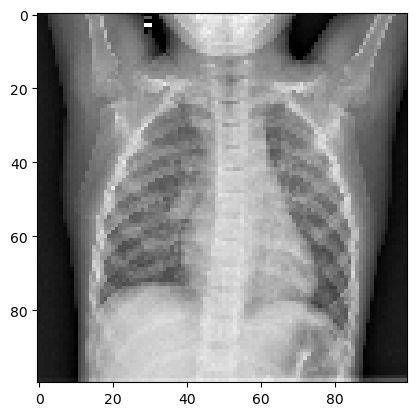

In [18]:
##### lets reshape the image which are placed on img_array (so far we are converting our image into gray scale)
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

##### Till now all code are example of how we handle our train data ,,,,,

#  Let's take Training data

### defining the function for training data according to the categories first coonverting the images into gray scale and second taking reshape of all images and last put in all final enchanced images into training data 

In [20]:
training_data = []
def create_training_data():
    for i in CATEGORIES:
        path = os.path.join(DataDir,i)
        class_num = CATEGORIES.index(i)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(img_size,img_size))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass

In [22]:
create_training_data()

In [23]:
print(len(training_data))

3875


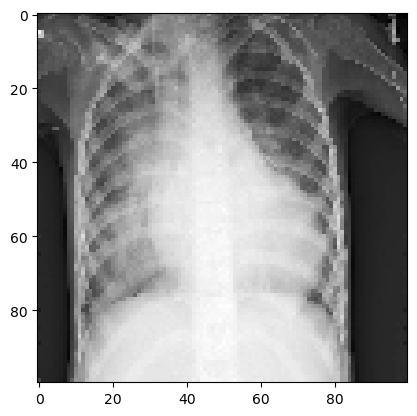

In [40]:

plt.imshow(training_data[4][0],cmap='gray')

In [61]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[180,  12,  31, ..., 198, 201, 207],
       [189, 173,  28, ..., 196, 201, 219],
       [ 28, 212,  36, ..., 199, 203, 209],
       ...,
       [  1,  53,  77, ...,  30,   7, 208],
       [  4,  56,  79, ...,  27, 209, 211],
       [  9,  58,  81, ...,  23, 210, 186]], dtype=uint8), 1]
[array([[13, 13, 11, ..., 16, 14, 12],
       [13, 11, 10, ..., 10, 15, 16],
       [ 7, 10,  6, ..., 14, 16, 18],
       ...,
       [18, 18, 15, ..., 27, 33, 30],
       [18, 17, 14, ..., 27, 37, 30],
       [19, 17, 14, ..., 28, 31, 30]], dtype=uint8), 1]
[array([[111, 120, 106, ...,  62,  66, 100],
       [145, 139, 144, ...,  60,  64, 101],
       [133, 133, 134, ...,  66,  74, 114],
       ...,
       [ 18,  17,  21, ...,  16,  18,  18],
       [ 18,  18,  15, ...,  14,  15,  18],
       [ 18,  18,  16, ...,  15,  16,  18]], dtype=uint8), 1]
[array([[147, 146, 150, ..., 138, 137, 151],
       [139, 149, 141, ..., 142, 150, 154],
       [139, 150, 144, ..., 136, 147, 152],
       ...,
      

## Lets taking feature and labels from the training data

#### Feature


In [62]:
x = []

#### Labels 

In [63]:
y = []

In [64]:
#taking feature and labels from the traing dataaa. (or you can say splitting feature and labels from training_data)
for features,labels in training_data:
    x.append(features)
    y.append(labels)

In [66]:
features

array([[ 23,  39,  57, ..., 205, 205, 210],
       [ 26,  42,  55, ..., 210, 215, 221],
       [ 16,  39,  51, ..., 215, 215, 231],
       ...,
       [ 10,   0,  89, ...,  19,  20,  25],
       [  4,   1, 113, ...,  19,  20,  20],
       [  2,   8, 116, ...,  18,  20,  20]], dtype=uint8)

### Here you can see our reshape deleted from all images which are all in feature

TypeError: Invalid shape () for image data

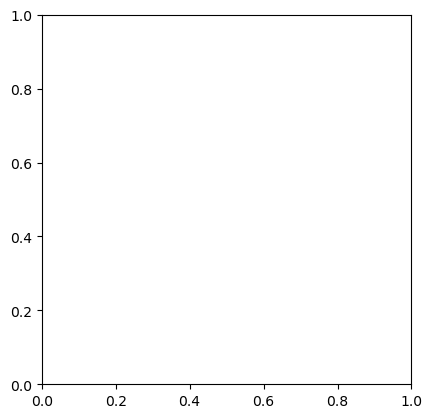

In [71]:
plt.imshow(features[0][0],cmap='gray')
plt.show()

## In order fix the error we agian reshape our feature (images)

In [72]:
x = np.array(x).reshape(-1,img_size,img_size,1)

In [73]:
y = np.array(y)

## Taking Validation data

#### before as we do for training data similarity doing with valdiation data

In [77]:
validation_data = []
DataDir_val = r"archive/chest_xray/val/"

In [78]:
def create_validating_data():
    for i in CATEGORIES:
        path = os.path.join(DataDir_val,i)
        class_num = CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                ## taking gray scale a imges
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                #reshaping gray scale images
                new_array = cv2.resize(img_array,(img_size,img_size))
                # appending this reshape gray scale images into validation_data
                validation_data.append([new_array,class_num])
            except Exception as e:
                pass
                

In [79]:
create_validating_data()

In [80]:
print(len(validation_data))

16


In [81]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  0,  85, 102, ...,  95,  73,  51],
       [ 50,  77,  90, ...,  83,  60,  39],
       [ 44,  62,  95, ...,  76,  55,  34],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[10, 32, 26, ..., 71, 64, 56],
       [11, 38, 35, ..., 79, 68, 61],
       [13, 37, 38, ..., 81, 76, 66],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[  2, 107,  75, ...,   0,   3,  10],
       [ 59, 105,  51, ...,   2,   0,  21],
       [122,  96,  15, ...,  11,   8,  35],
       ...,
       [  0,   0,  18, ...,   0,   0,   0],
       [  0,   0,  13, ...,   0,   0,   0],
       [  2,   0,  11, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[  2,  56,  64, ...,  16,   7,   2],
       [242,  56,  65, ...,  10,   5,   1],
       [ 49,  59,  63, ...,   7,   4,   0],
       ...,
      

## taking feature and labels form validation data

In [83]:
#features
x_val = []
#labels
y_val = []

In [84]:
#taking feature and labels data from validation data
for features, labels in validation_data:
    x_val.append(features)
    y_val.append(labels)
    

## Reshape again (why---> You know in training data...or ...got to training data this step)

In [85]:
y_val = np.array(y_val)
x_val = np.array(x_val).reshape(-1,img_size,img_size,1)

## Model Part Start

#### importing the libraries for training the model and adding the neural network layers

In [91]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
import pickle
from keras.layers import Conv2D, MaxPooling2D

##### just a scaling the features like feature scaling in machine learning

In [92]:
x = x/255.0
x_val = x_val/255.0

In [93]:
x.shape

(3875, 100, 100, 1)

In [94]:
x_val.shape

(16, 100, 100, 1)

## Building our Model

In [95]:
#Loading model
model = Sequential()
#adding all layers

## 1st convetional layer
model.add(Conv2D(64,(3,3),input_shape = x.shape[1:]))     #|
model.add(Activation('relu'))                             #|    #convetion layers
model.add(MaxPooling2D(pool_size=(2,2)))                  #|
model.add(Dropout(.2))


## 2nd convetional layer
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

## 3rd conventional layer
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

#Flatten layer
model.add(Flatten())

## 1st Hidden layer
model.add(Dense(64))
model.add(Dropout(.5))

## Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))


C:\Users\ddeba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,638,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [98]:
model.fit(x,y,batch_size=4,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.9990 - loss: 0.0016 - val_accuracy: 0.5000 - val_loss: 153.7820
Epoch 2/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 153.7820
Epoch 3/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 153.7820
Epoch 4/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 153.7820
Epoch 5/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 153.7820
Epoch 6/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 153.7820
Epoch 7/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 153.7820
Epoch 8/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/ste

In [99]:
model.save(r'model_10.h5')

## Testing of model

In [100]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model


In [101]:
CATEGORIES = ['NORMAL','PNEUMONIA']

### Creating a function for preparing the image for predicting the class

In [113]:
def prepare(image):
    img_size = 100
    #img_array = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    #or
    img = tf.keras.preprocessing.image.load_img(image,color_mode='grayscale',target_size=(img_size,img_size))
    new_array = tf.keras.preprocessing.image.img_to_array(img)
    return new_array.reshape(-1,img_size,img_size,1)

###### Loading the model from model_10.h5

In [108]:
model = load_model('model_10.h5')

In [109]:
model = tf.keras.models.load_model(r'model_10.h5')

### Taking a images

In [111]:
image = 'archive/chest_xray/test/NORMAL/IM-0003-0001.jpeg'

## Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[1.]]
1
PNEUMONIA


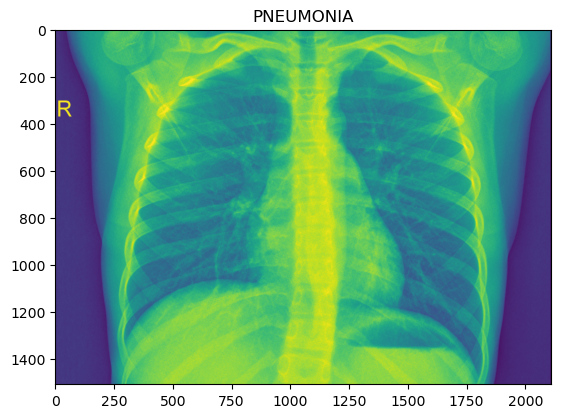

In [115]:
prediction = model.predict([prepare(image)/255.0])   #in prediction here just fast scaling our image
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

##showing the image
img = mpimg.imread(image)
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()